In [1]:
!pip install fastai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 76.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
from fastai.vision.all import *

In [3]:
!unzip -q "flowers.zip" -d "flowers"

In [4]:
path = Path("flowers/flowers")
dls = ImageDataLoaders.from_folder(path,
                                   valid_pct=0.2,
                                   seed=42,
                                   item_tfms=Resize(224),
                                   batch_tfms=aug_transforms())

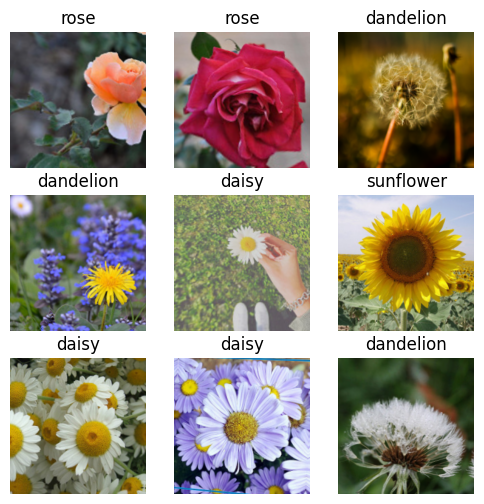

In [5]:
dls.show_batch(max_n=9, figsize=(6,6))

In [6]:
learn = vision_learner(dls,
                       resnet34,
                       metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 198MB/s]


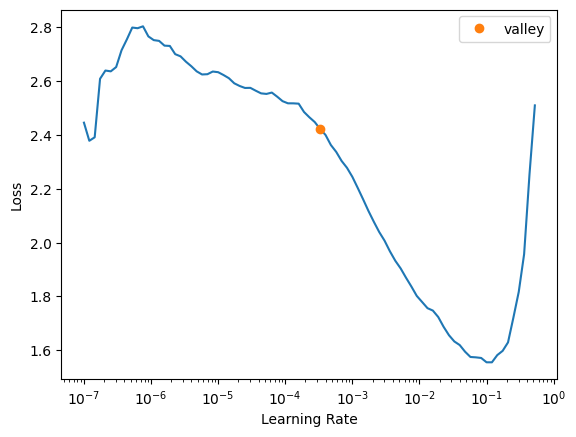

In [7]:
lr_ = learn.lr_find()

In [8]:
learn.fine_tune(3, base_lr=lr_.valley)

epoch,train_loss,valid_loss,accuracy,time
0,1.593260,0.521779,0.813657,00:19


epoch,train_loss,valid_loss,accuracy,time
0,0.738257,0.364390,0.871528,00:22
1,0.578965,0.296552,0.896991,00:23
2,0.465433,0.287879,0.906250,00:23


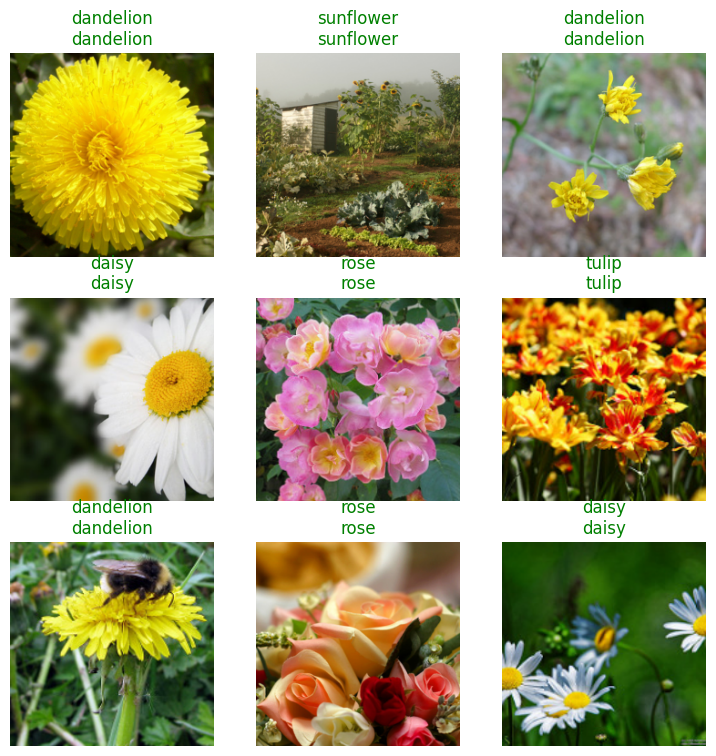

In [11]:
learn.show_results()

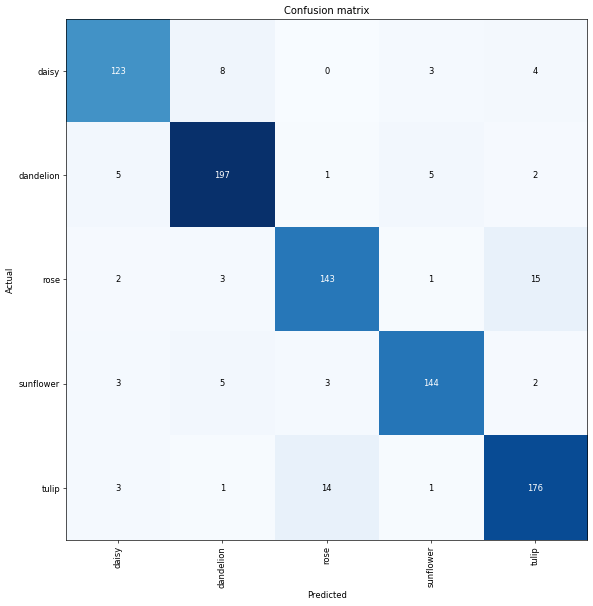

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10,10), dpi=60)

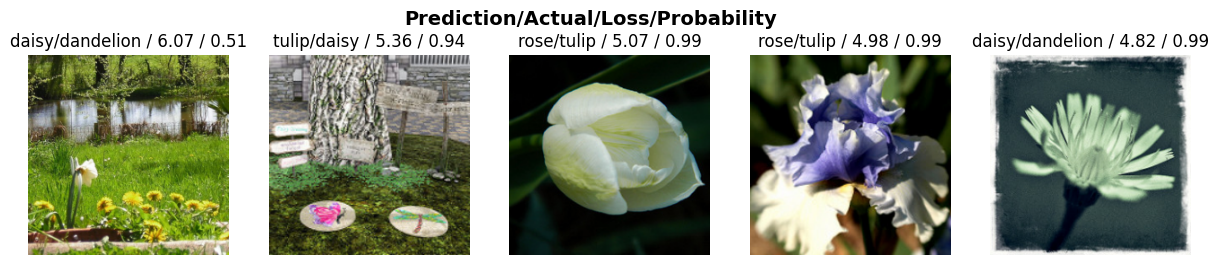

In [15]:
interp.plot_top_losses(5, nrows=1)

In [16]:
learn.export('plant_disease_model.pkl')